In [1]:
import sys
sys.path.append("..")
import VG_graphs
from VG_graphs import copy_graph, get_realistic_graphs_dataset, plot_graph
import networkx as nx
import matplotlib.pyplot as plt
import random

In [2]:
dataset = get_realistic_graphs_dataset()

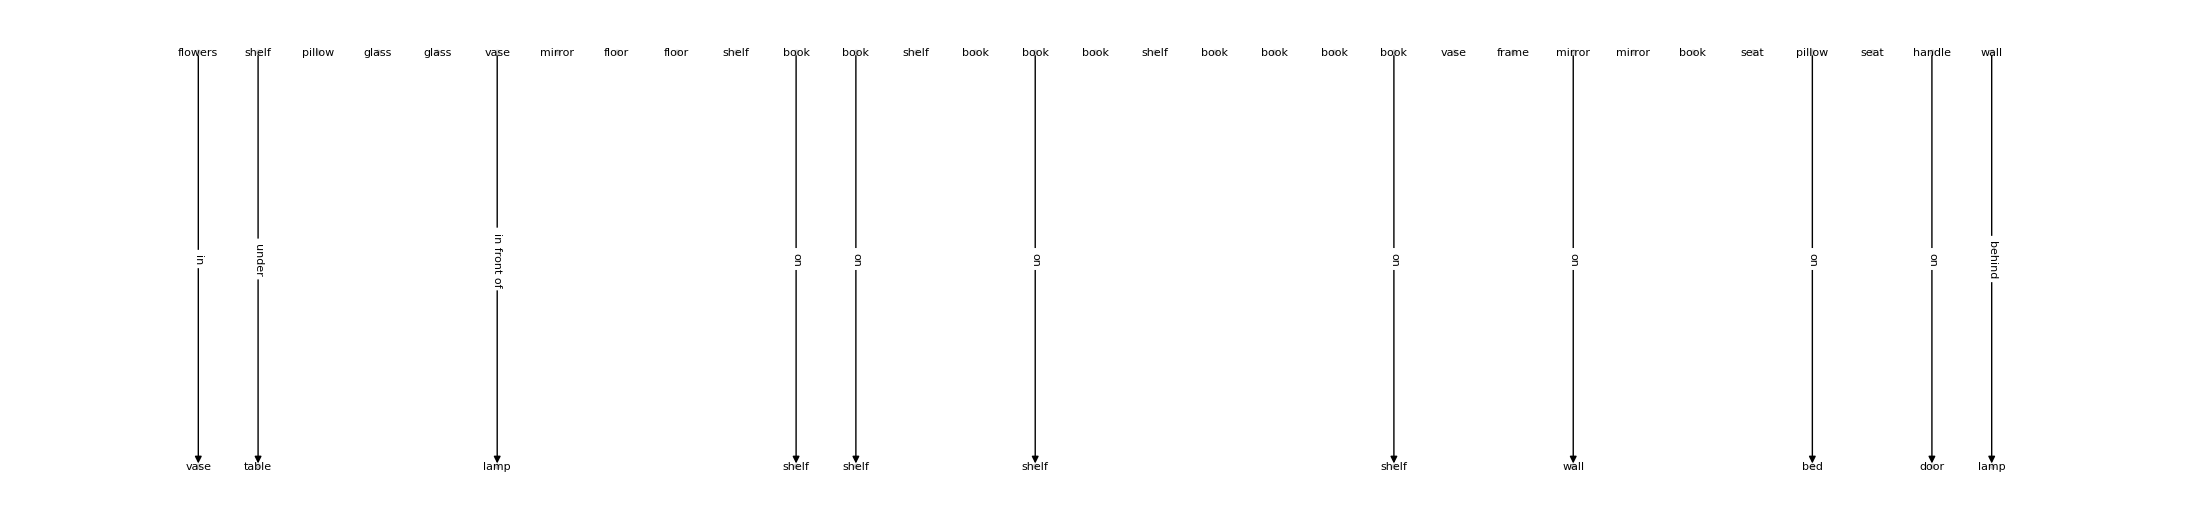

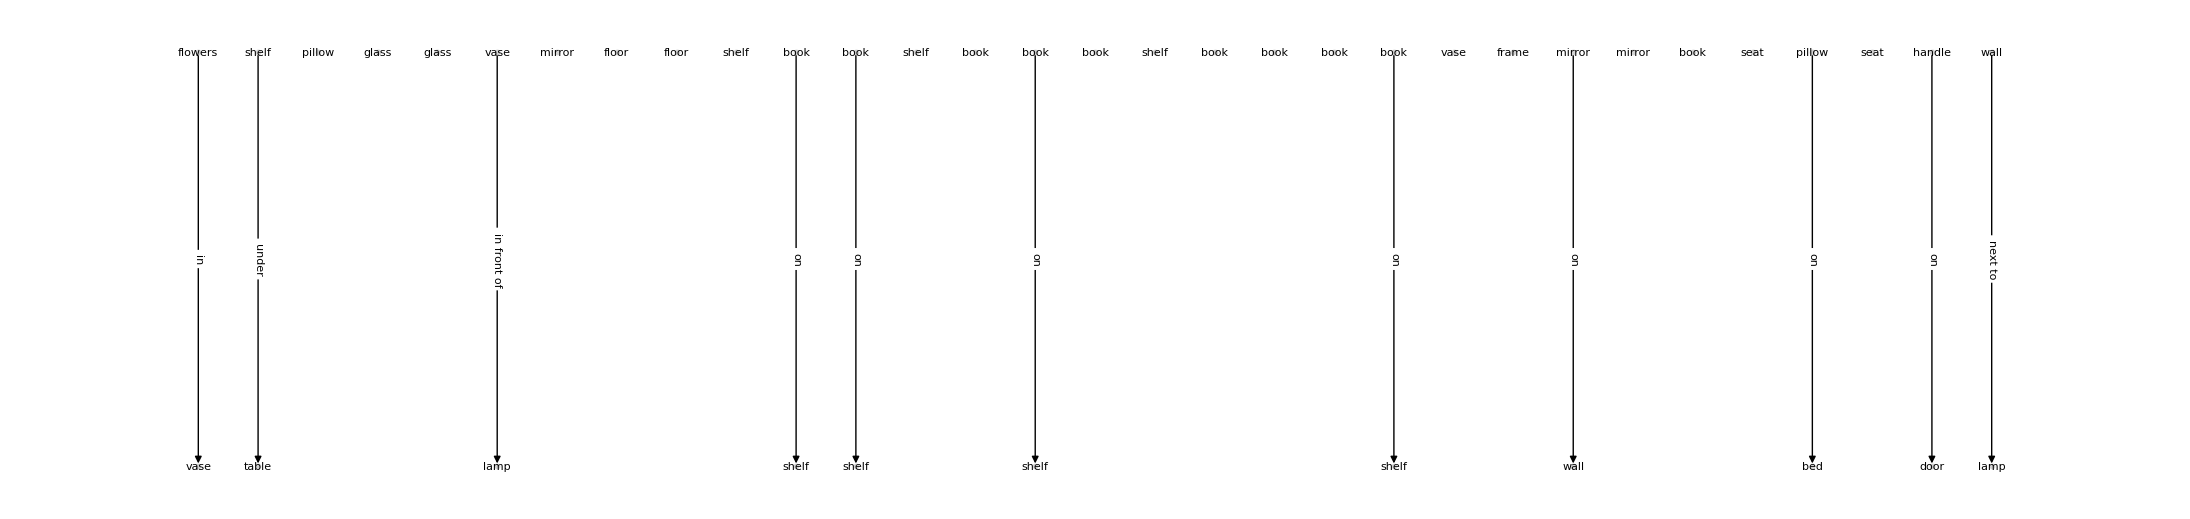

original_predicate:  behind
adv_predicate:  next to
image_id:  84


In [3]:
random.shuffle(dataset)
sample = dataset[0]
original_graph = sample['original_graph']
adv_graph = sample['adv_graph']
changed_edge = sample['changed_edge']
adv_predicate = sample['adv_predicate']
plot_graph(original_graph)
plot_graph(adv_graph)
print("original_predicate: ", original_graph.edges[changed_edge]['predicate'])
print("adv_predicate: ", adv_graph.edges[changed_edge]['predicate'])
print("image_id: ", sample['original_graph'].image_id)

In [4]:
list_dict_for_json = []
for d in dataset:
    original_graph = d['original_graph']
    adv_graph = d['adv_graph']
    changed_edge = d['changed_edge']
    adv_predicate = d['adv_predicate']
    image_id = original_graph.image_id
    list_dict_for_json.append({
        'image_id': image_id,
        'changed_edge_subj': changed_edge[0],
        'changed_edge_obj': changed_edge[1],
        'original_predicate': original_graph.edges[changed_edge]['predicate'],
        'adv_predicate': adv_predicate,
        'subj_x': original_graph.nodes[changed_edge[0]]['x'],
        'subj_y': original_graph.nodes[changed_edge[0]]['y'],
        'subj_name': original_graph.nodes[changed_edge[0]]['name'],
        'subj_w': original_graph.nodes[changed_edge[0]]['w'],
        'subj_h': original_graph.nodes[changed_edge[0]]['h'],
        'obj_x': original_graph.nodes[changed_edge[1]]['x'],
        'obj_y': original_graph.nodes[changed_edge[1]]['y'],
        'obj_name': original_graph.nodes[changed_edge[1]]['name'],
        'obj_w': original_graph.nodes[changed_edge[1]]['w'],
        'obj_h': original_graph.nodes[changed_edge[1]]['h'],
    })
import json
with open('realistic_adversarial_samples_fixed.json', 'w') as f:
    json.dump(list_dict_for_json, f)
